In [1]:
# add state of interest by abbreviation
states_of_interest = ['MA','NY','FL', 'TX', 'PA', 'NJ', 'WA']
death_threshold = 10000

In [2]:
import pandas as pd

filtered_state_data = []
read_in = pd.read_csv('/Users/AdamSoubh/Documents/Code/COVID/metadata/all-states-history.csv', header=0, index_col=None)

for state in states_of_interest:
    state_data = read_in[read_in['state'].str.contains(state)]
    filtered_state_data.append(state_data)
filtered_state_data = pd.concat(filtered_state_data)

death_count = filtered_state_data[['date', 'state', 'death']]
death_count = death_count.sort_values(by=['date'])

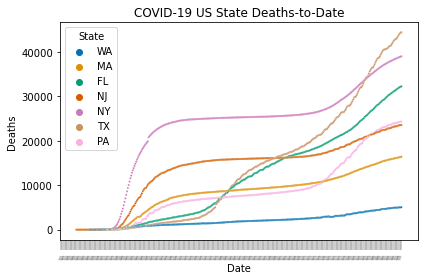

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style("ticks")
deaths_to_date = sns.scatterplot(x = death_count['date'], 
                    y = death_count['death'], 
                    hue = death_count['state'], 
                    palette = 'colorblind',
                    s=4)
#plt.grid(visible=True, which='major', axis='both')
legend1_title = plt.legend(title='State')
plt1_ticks = plt.tick_params(axis='x', labelsize=1, labelrotation=70, width=0.2, length = 10)
plt1_xlabel = plt.xlabel('Date')
plt1_ylabel = plt.ylabel('Deaths')
plt1_title = plt.title('COVID-19 US State Deaths-to-Date')
fit1 = plt.tight_layout()

save1 = plt.savefig('/Users/AdamSoubh/Documents/Code/COVID/results/deaths_to_date1.png', dpi=1000)

In [5]:
hospitalizations_count = filtered_state_data[['date','state','hospitalized']]
hospitalizations_count = hospitalizations_count.sort_values(by=['date'])

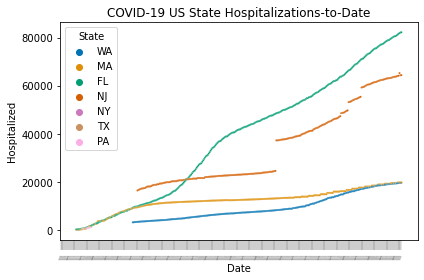

In [6]:
hospitalizations_to_date = sns.scatterplot(x = hospitalizations_count['date'], 
                    y = hospitalizations_count['hospitalized'], 
                    hue = hospitalizations_count['state'], 
                    palette = 'colorblind',
                    s=4)
legend2_title = plt.legend(title='State')
plt2_ticks = plt.tick_params(axis='x', labelsize=1, labelrotation=70, width=0.2, length = 10)
plt2_xlabel = plt.xlabel('Date')
plt2_ylabel = plt.ylabel('Hospitalized')
plt2_title = plt.title('COVID-19 US State Hospitalizations-to-Date')
fit2 = plt.tight_layout()
save2 = plt.savefig('/Users/AdamSoubh/Documents/Code/COVID/results/hospitalizations_to_date.png', dpi=1000)

In [92]:
read_in_deaths = pd.read_csv('/Users/AdamSoubh/Documents/Code/COVID/metadata/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv', header = 0, index_col = None)
read_in_deaths = read_in_deaths[['submission_date', 'state', 'conf_death']]
read_in_deaths['submission_date'] =pd.to_datetime(read_in_deaths.submission_date)
read_in_deaths = read_in_deaths.sort_values(by=['state', 'submission_date'])
read_in_deaths = read_in_deaths.reset_index(drop=True)

In [96]:
death_state_data2 = []

states_of_interest2 = ['VA', 'WY', 'AL', 'UT', 'ID', 'LA']
for state in states_of_interest2:
    state_data = read_in_deaths[read_in_deaths['state'].str.contains(state)]
    death_state_data2.append(state_data)
death_state_data2 = pd.concat(death_state_data2)

death_state_data2 = death_state_data2.sort_values(by=['submission_date'])

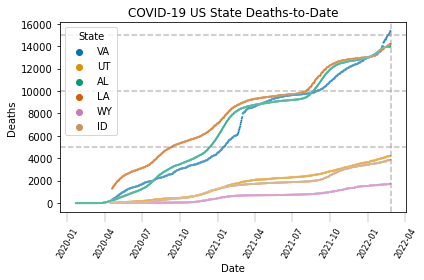

In [109]:
import datetime as dt

deaths_to_date2 = sns.scatterplot(x = death_state_data2['submission_date'], 
                    y = death_state_data2['conf_death'], 
                    hue = death_state_data2['state'], 
                    palette = 'colorblind',
                    s=4)
legend3_title = plt.legend(title='State')
plt3_ticks = plt.tick_params(axis='x', labelsize=8, labelrotation=60, width=0.2, length = 10)
plt3_xlabel = plt.xlabel('Date')
plt3_ylabel = plt.ylabel('Deaths')
plt3_title = plt.title('COVID-19 US State Deaths-to-Date')
plt.axhline(y=15000, color='grey', linestyle='--', alpha=0.5)
plt.axhline(y=10000, color='grey', linestyle='--', alpha=0.5)
plt.axhline(y=5000, color='grey', linestyle='--', alpha=0.5)
plt.axvline(dt.datetime(2022, 2, 25), color='grey', linestyle='--', alpha=0.5)
fit3 = plt.tight_layout()
save3 = plt.savefig('/Users/AdamSoubh/Documents/Code/COVID/results/deaths_to_date2.png', dpi=500)

In [91]:
read_in_vaccines = pd.read_csv('/Users/AdamSoubh/Documents/Code/COVID/metadata/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv', header = 0, index_col = None)